# Example from the paper

In [6]:
# use the outgrad backage for the coputations of gradient
import functions 
import autograd.numpy as np
import pandas as pd
import subprocess
import time
import matplotlib.pyplot as plt
   
np.random.seed(0)                      # to obtain a consistent solution

In [7]:
#define the right side function of the system of differential equations
def right_side(x, y):
    f1 = np.cos(x)+(y[0])**2+y[1]-(1+x**2+np.sin(x)*np.sin(x))
    f2 = 2*x-(1+x*x)*np.sin(x) + y[0]*y[1]
    return np.array([f1,f2])

In [8]:
# the initial values 
a1 = 0
a2=  1.0

In [9]:
# the analytical solution is given by 
def analytic(x):
    an_sol = np.zeros((2, len(x)))
    an_sol[0] = np.sin(x)
    an_sol[1] = 1+x*x  
    return an_sol  

Cost after iteration 10: 3.363722
Cost after iteration 20: 2.574068
Cost after iteration 30: 1.880386
Cost after iteration 40: 1.284071
Cost after iteration 50: 0.792938
Cost after iteration 60: 0.438380
Cost after iteration 70: 0.273301
Cost after iteration 80: 0.191428
Cost after iteration 90: 0.121871
Cost after iteration 100: 0.072012
Cost after iteration 110: 0.041391
Cost after iteration 120: 0.023179
Cost after iteration 130: 0.013819
Cost after iteration 140: 0.009692
Cost after iteration 150: 0.008042
Cost after iteration 160: 0.007478
Cost after iteration 170: 0.007310
Cost after iteration 180: 0.007268
Cost after iteration 190: 0.007261
Cost after iteration 200: 0.007260
Cost after iteration 210: 0.007260
Cost after iteration 220: 0.007260
Cost after iteration 230: 0.007260
Cost after iteration 240: 0.007260
Cost after iteration 250: 0.007259
Cost after iteration 260: 0.007259
Cost after iteration 270: 0.007259
Cost after iteration 280: 0.007259
Cost after iteration 290: 0.0

Cost after iteration 850: 0.009480
Cost after iteration 860: 0.009480
Cost after iteration 870: 0.009480
Cost after iteration 880: 0.009480
Cost after iteration 890: 0.009479
Cost after iteration 900: 0.009479
Cost after iteration 910: 0.009479
Cost after iteration 920: 0.009479
Cost after iteration 930: 0.009479
Cost after iteration 940: 0.009478
Cost after iteration 950: 0.009478
Cost after iteration 960: 0.009478
Cost after iteration 970: 0.009478
Cost after iteration 980: 0.009477
Cost after iteration 990: 0.009477
Cost after iteration 1000: 0.009477
Cost after iteration 1010: 0.009477
Cost after iteration 1020: 0.009476
Cost after iteration 1030: 0.009476
Cost after iteration 1040: 0.009476
Cost after iteration 1050: 0.009476
Cost after iteration 1060: 0.009475
Cost after iteration 1070: 0.009475
Cost after iteration 1080: 0.009475
Cost after iteration 1090: 0.009475
Cost after iteration 1100: 0.009474
Cost after iteration 1110: 0.009474
Cost after iteration 1120: 0.009474
Cost af

Cost after iteration 230: 0.013973
Cost after iteration 240: 0.013973
Cost after iteration 250: 0.013973
Cost after iteration 260: 0.013973
Cost after iteration 270: 0.013972
Cost after iteration 280: 0.013972
Cost after iteration 290: 0.013972
Cost after iteration 300: 0.013972
Cost after iteration 310: 0.013971
Cost after iteration 320: 0.013971
Cost after iteration 330: 0.013971
Cost after iteration 340: 0.013970
Cost after iteration 350: 0.013970
Cost after iteration 360: 0.013970
Cost after iteration 370: 0.013970
Cost after iteration 380: 0.013969
Cost after iteration 390: 0.013969
Cost after iteration 400: 0.013969
Cost after iteration 410: 0.013969
Cost after iteration 420: 0.013968
Cost after iteration 430: 0.013968
Cost after iteration 440: 0.013968
Cost after iteration 450: 0.013967
Cost after iteration 460: 0.013967
Cost after iteration 470: 0.013967
Cost after iteration 480: 0.013967
Cost after iteration 490: 0.013966
Cost after iteration 500: 0.013966
Cost after iteration

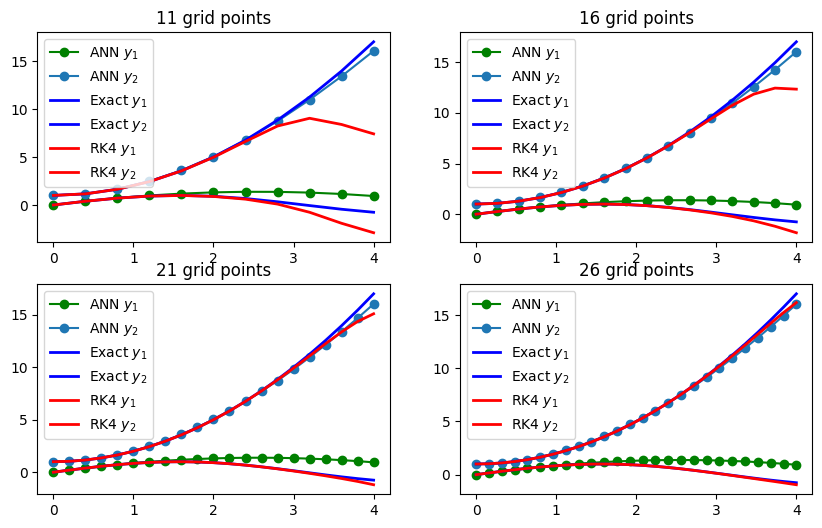

In [16]:
# Input Data
a, b =  [0.0, 1.0]               # the domain                       
m = 11                            # number of sample points between a and b

ANN_er = []    # for storing neural network solution
RK4_er = []    # for storing Runge-Kutta solution


#=============Experiment 4: Grid effect RK4 vs ANN================================
"""
ANN verses RK4 -experiment on the size of grid points
"""
# Descretize the domain             
t0, tend = [0.0, 4.0]     

# diffent size of grid points between a and b.
M = [11, 16, 21, 26]

# store the absulte errors due to ANN and RKR 
ANN_er = []
RK4_er = []

fig5 = plt.figure(figsize= (10,6))
for m in range(len(M)):
    
    t = np.linspace(t0,tend, M[m])         # generate the  points
    x = (t-min(t))/(max(t)-min(t))         # normalize data
    X = np.zeros((1,M[m]))             
    X[0] = x
    T = np.zeros((1,M[m]))             
    T[0]= t
    h = 60
    ITs1 = 1500
    tol1 = 1e-06
    
    # ode_nn_model = ode_nn_model1 but does not store Iter and Cost
    param1, param2 = functions.ode_nn_model(X, h, a1, a2, a, right_side, tol1, ITs1, iter = 0, print_cost = True)
    
    # Using the learned parameters we compute the ANN soutions
    def Nt1(X, param1):
        W11 = param1["W11"]
        b11 = param1["b11"]
        W12 = param1["W12"]
        b12 = param1["b12"] 
        Z1 = np.dot(W11,X) + b11
        A1 = functions.sigmoid(Z1)
        Z2 = np.dot(W12,A1)+ b12
        A2 = Z2
        return np.array(a1 + (X-t0)*A2[0])       # the first component
        
    def Nt2(X, param2):
        W21 = param2["W21"]
        b21 = param2["b21"]
        W22 = param2["W22"]
        b22 = param2["b22"] 
        Z1 = np.dot(W21,X) + b21
        A1 = functions.sigmoid(Z1)
        Z2 = np.dot(W22,A1)+ b22
        A2 = Z2
        return np.array(a2 + (X-t0)*A2[1])          # the second component
    
    # ANN solution
    y1 = Nt1(T, param1)
    y2 = Nt2(T, param2)
    
    
    # For comparision compute the exact solution
    exact = analytic(t)
    
    # RK4 solution
    u = np.array([0.0, 1.0])
    time, RK = functions.RungeKutta4(right_side, t0, tend, u, M[m])

    # We plot the trajectories    
    plt.subplot(2, 2, m+1)
    
    plt.plot(t, y1[0], 'g-o')
    plt.plot(t, y2[0], '-o')
    plt.plot(t, exact[0],'blue', lw=2)
    plt.plot(t, exact[1],'blue', lw=2)
    plt.plot(time, RK[:, 0],'r', lw=2)
    plt.plot(time, RK[:, 1],'-r',lw=2)  
    plt.title(str(M[m]) + " grid points")
    plt.legend(['ANN $y_1$','ANN $y_2$', 'Exact $y_1$','Exact $y_2$', 'RK4 $y_1$', 'RK4 $y_2$'])

    # the error at the end point
    ANN_er.append(round(abs(y2[0]-exact[1])[-1], 3))
    RK4_er.append(round(abs(exact[1]- RK[:,1])[-1],3))
    
# save the plot in folder Figures
plt.show()
 
# for a data frame
data = {'ANN_error': ANN_er, 'RK4_error': RK4_er }
summary_table = pd.DataFrame(data= data , index = M )

# # the following code save the table as latex and pdf
# filename = '../results/out1.tex'
# pdffile =  '../results/out1.pdf', 
    
# template = r'''\documentclass{{standalone}}
#    \usepackage{{booktabs}}
#     \begin{{document}}
#     {}
#     \end{{document}}
#     '''
    
# with open(filename, 'w') as f:
#     f.write(template.format(summary_table.to_latex()))
    
# subprocess.call(['pdflatex', filename])


In [13]:
# for a data frame
data = {'ANN_error': ANN_er, 'RK4_error': RK4_er }
summary_table = pd.DataFrame(data= data , index = M )

In [14]:
print(summary_table)

    ANN_error  RK4_error
11      0.966      9.588
16      0.945      4.668
21      0.992      1.902
26      0.977      0.825
